# Dependencias

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos

In [2]:
data = np.load("proyecto_training_data.npy")
columns = ["SalePrice","OverallQuality","1stFlrSquareFeet","TotalRoomsAboveGrade","YearBuilt","LotFrontage"]
df = pd.DataFrame(data,columns=columns)
print(f"cantidad de registros {data.shape}")

cantidad de registros (1460, 6)


# Slicing

In [33]:
training_items = data.shape[0] * 80//100
testing_items = data.shape[0] - training_items 
print(f"cantidad de items para entrenamiento {training_items}, cantidad de items para pruebas {testing_items}")

training_set = data[:training_items]
testing_set = data[training_items:]

df_training = pd.DataFrame(training_set,columns=columns)
df_test = pd.DataFrame(testing_set,columns=columns)

cantidad de items para entrenamiento 1168, cantidad de items para pruebas 292


# Exploratorio

## Media

In [4]:
mean = df.mean()
print(mean)

SalePrice               180921.195890
OverallQuality               6.099315
1stFlrSquareFeet          1162.626712
TotalRoomsAboveGrade         6.517808
YearBuilt                 1971.267808
LotFrontage                 70.049958
dtype: float64


## Maximo

In [5]:
max = df.max()
print(mean)

SalePrice               180921.195890
OverallQuality               6.099315
1stFlrSquareFeet          1162.626712
TotalRoomsAboveGrade         6.517808
YearBuilt                 1971.267808
LotFrontage                 70.049958
dtype: float64


## Minimo

In [6]:
min = df.min()
print(min)

SalePrice               34900.0
OverallQuality              1.0
1stFlrSquareFeet          334.0
TotalRoomsAboveGrade        2.0
YearBuilt                1872.0
LotFrontage                21.0
dtype: float64


## peak

In [7]:
peak = df.max() - df.min()
print(peak)

SalePrice               720100.0
OverallQuality               9.0
1stFlrSquareFeet          4358.0
TotalRoomsAboveGrade        12.0
YearBuilt                  138.0
LotFrontage                292.0
dtype: float64


## Desviacion estandar

In [8]:
std = df.std()
print(std)

SalePrice               79442.502883
OverallQuality              1.382997
1stFlrSquareFeet          386.587738
TotalRoomsAboveGrade        1.625393
YearBuilt                  30.202904
LotFrontage                24.284752
dtype: float64


# Histograma

<Figure size 5000x2000 with 0 Axes>

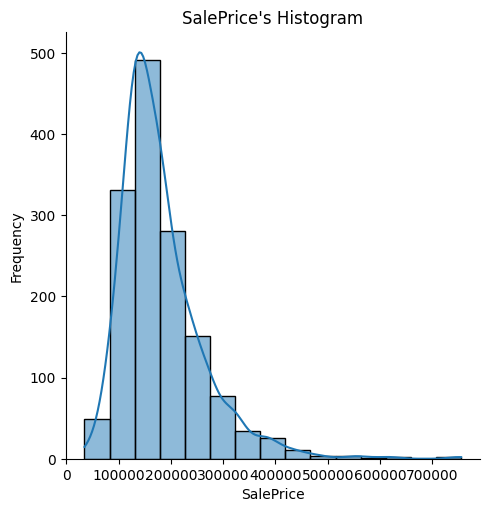

<Figure size 5000x2000 with 0 Axes>

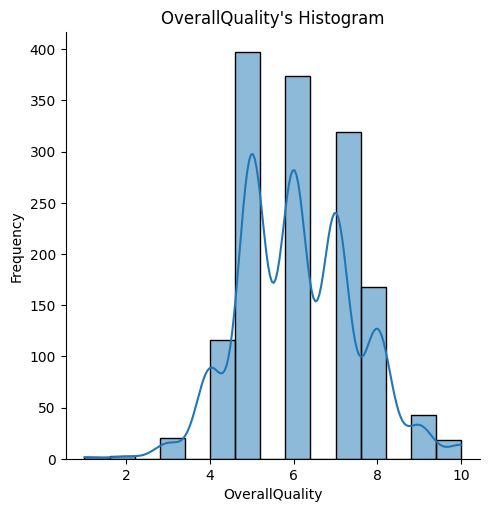

<Figure size 5000x2000 with 0 Axes>

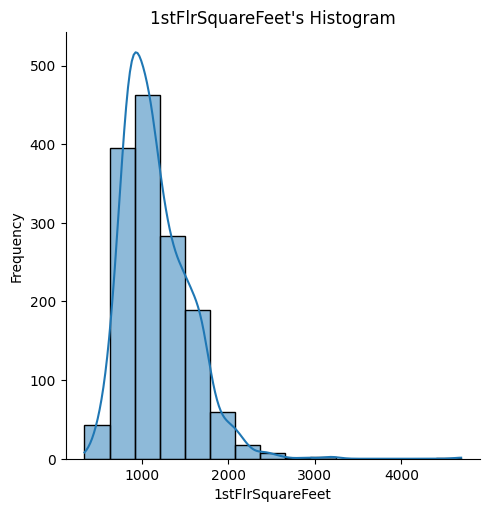

<Figure size 5000x2000 with 0 Axes>

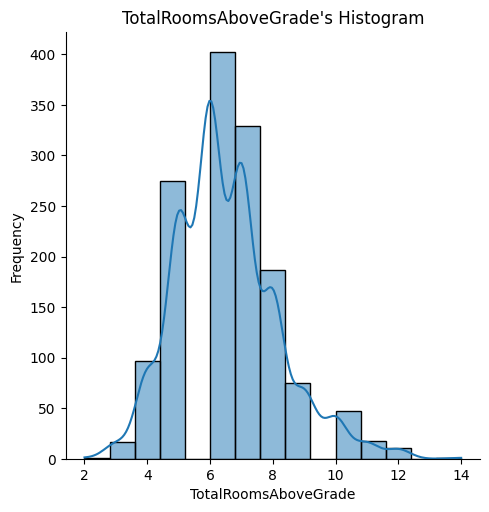

<Figure size 5000x2000 with 0 Axes>

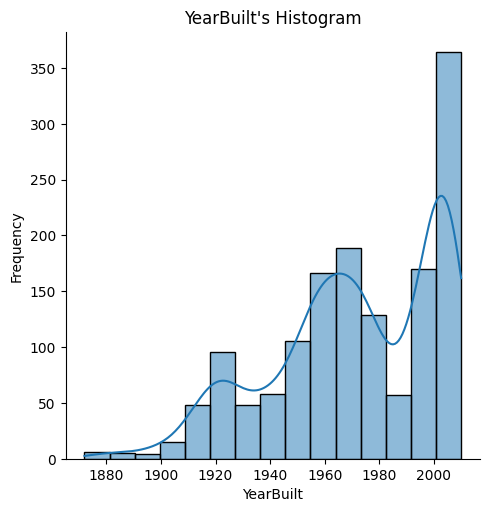

<Figure size 5000x2000 with 0 Axes>

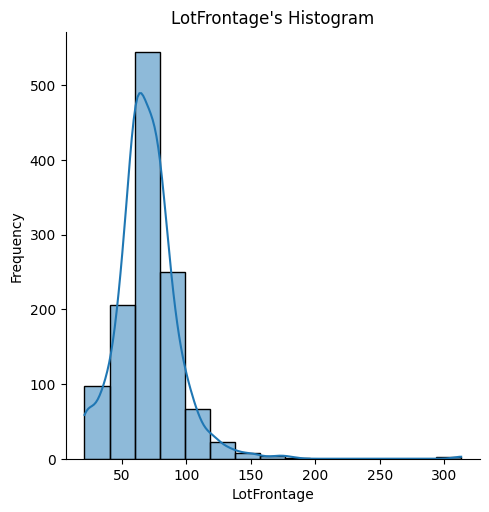

In [9]:
def histogram_show(column):
    plt.figure(figsize=(50, 20)) 
    sns.displot(df[column], bins=15, kde=True) 
    plt.title(f"{column}'s Histogram")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

for columna in df.columns:
    histogram_show(columna)

# 5. Para cada variable independiente X

In [19]:
correlations = []
y_key = "SalePrice"

def create_catter_plot(x,y,x_name,y_name,title):
    plt.scatter(x, y)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title)
    plt.show()

for column in df.columns: 
    if(column == y_key):
        continue
    correlation = df[column].corr(df[y_key])
    print(f"variable: '{column}' correlacion: {correlation}")
    correlations.append((column,y_key,correlation))

correlations =  sorted(correlations, key=lambda x: x[2], reverse=True)


variable: 'OverallQuality' correlacion: 0.7909816005838052
variable: '1stFlrSquareFeet' correlacion: 0.6058521846919145
variable: 'TotalRoomsAboveGrade' correlacion: 0.5337231555820281
variable: 'YearBuilt' correlacion: 0.5228973328794968
variable: 'LotFrontage' correlacion: 0.351799096570678


('OverallQuality', 'SalePrice', 0.7909816005838052)


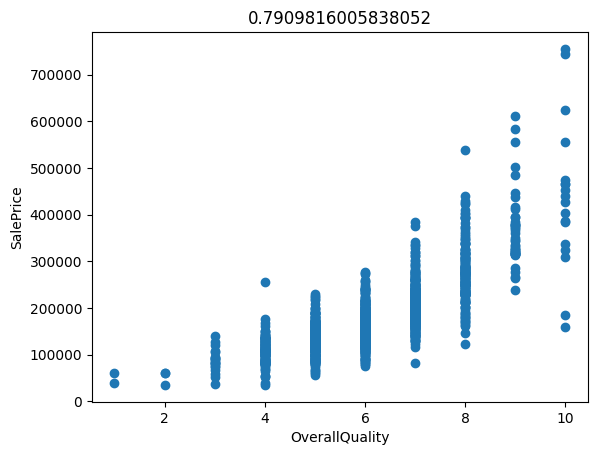

('1stFlrSquareFeet', 'SalePrice', 0.6058521846919145)


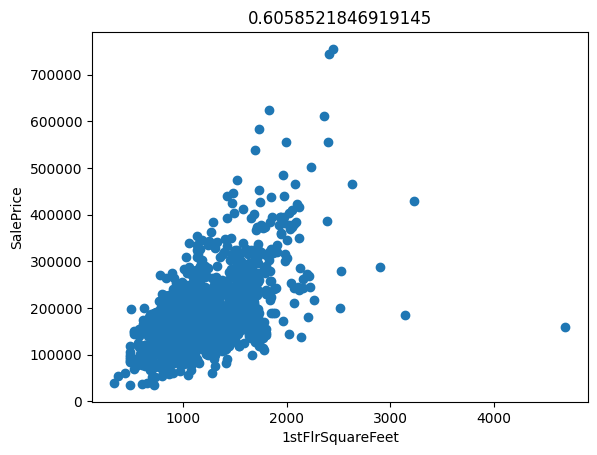

('TotalRoomsAboveGrade', 'SalePrice', 0.5337231555820281)


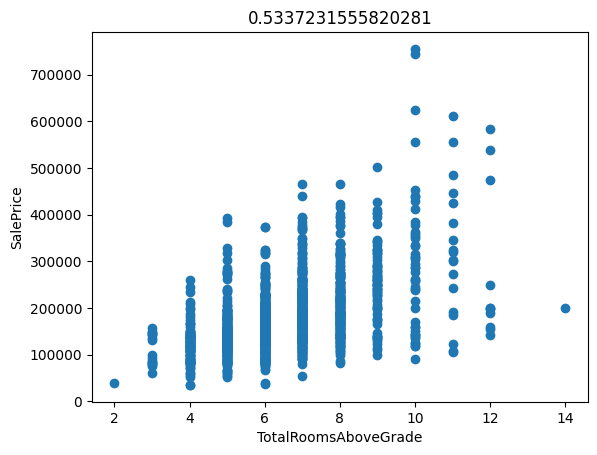

('YearBuilt', 'SalePrice', 0.5228973328794968)


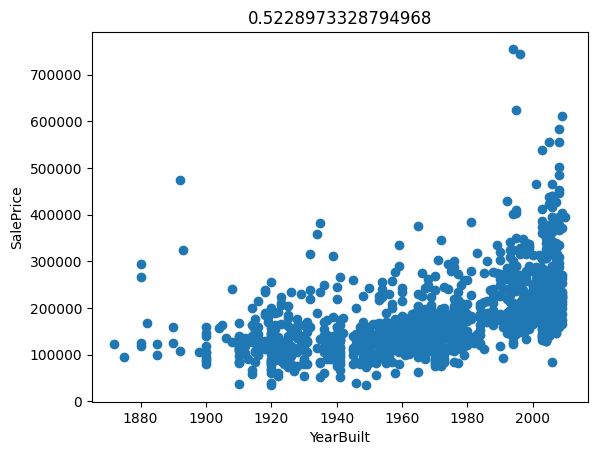

('LotFrontage', 'SalePrice', 0.351799096570678)


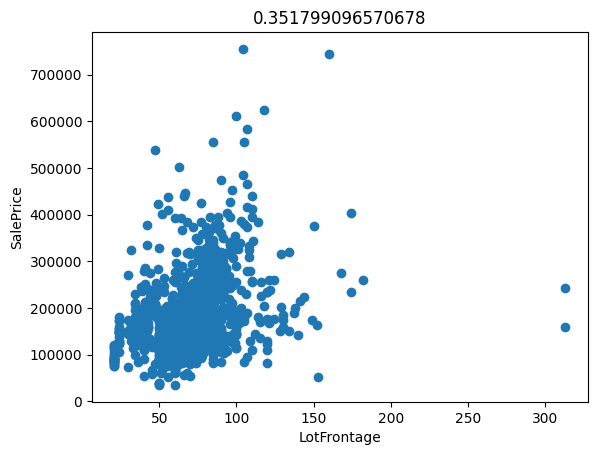

In [24]:
for item in correlations:
    print(item)
    x_key = item[0]
    y_key = item[1]
    correlation = item[2]
    create_catter_plot(df[x_key],df[y_key],x_key,y_key,correlation)


## Mejores 2 variables

In [30]:
first_var = correlations[0]
second_var = correlations[1]

print(f"La mejor variable es: {first_var[0]}, con una correlacion de {first_var[2]}")
print(f"La segunda mejor variable es: {second_var[0]}, con una correlacion de {second_var[2]}")

La mejor variable es: OverallQuality, con una correlacion de 0.7909816005838052
La segunda mejor variable es: 1stFlrSquareFeet, con una correlacion de 0.6058521846919145


# Crear funcion para entrenar modelo

In [174]:

    
#training_func()
x = df_training[first_var[0]]
y = df_training[y_key]
alpha = 0.04312


def training_func(x,y,alpha):
    n = len(x)
    
    betas = np.array([0,0])
    
    y_hat = 0
    
    response = {}
    
    for epoch in range(2000) :

        X_b = np.c_[np.ones((n, 1)), x] 
        y_hat = np.dot(X_b, betas)
        
        error_betas = np.array([np.sum((y_hat - y)),np.sum((y_hat - y)*x)])
        error_betas = np.dot(1/n,error_betas)

        betas = betas - alpha*error_betas

        error = (1/(2*n)) *  np.sum((y - y_hat)**2)
        
        response[epoch] = {
            "beta0":error_betas[0],
            "beta1":error_betas[0],
            "error":error
        }
        
    return response
    
training_func(x,y,alpha)



{0: {'beta0': -180590.27739726027,
  'beta1': -180590.27739726027,
  'error': 19409722053.221745},
 1: {'beta0': 139717.6556087064,
  'beta1': 139717.6556087064,
  'error': 10939476469.049522},
 2: {'beta0': -93459.9632281363,
  'beta1': -93459.9632281363,
  'error': 6450812441.854005},
 3: {'beta0': 76259.46054028551,
  'beta1': 76259.46054028551,
  'error': 4071900959.4299316},
 4: {'beta0': -47300.66654195498,
  'beta1': -47300.66654195498,
  'error': 2810901870.0605593},
 5: {'beta0': 42625.3076536778,
  'beta1': 42625.3076536778,
  'error': 2142261350.7300105},
 6: {'beta0': -22850.954509542556,
  'beta1': -22850.954509542556,
  'error': 1787500229.1466756},
 7: {'beta0': 24794.281778723012,
  'beta1': 24794.281778723012,
  'error': 1599058640.0625768},
 8: {'beta0': -9904.626724455047,
  'beta1': -9904.626724455047,
  'error': 1498747918.0278387},
 9: {'beta0': 15337.014788414983,
  'beta1': 15337.014788414983,
  'error': 1445137638.0081975},
 10: {'beta0': -3053.647019226267,
  

In [160]:
print(y)


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1163    108959.0
1164    194000.0
1165    233170.0
1166    245350.0
1167    173000.0
Name: SalePrice, Length: 1168, dtype: float64
